In [84]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
bike=pd.read_csv(r"C:\Users\vasan\OneDrive\Desktop\AI_ML\Linear Regression\Assignment\day.csv")

In [86]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [87]:
bike.shape

(730, 16)

In [88]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [89]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [91]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [92]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [93]:
bike.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [94]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [95]:
continous_var=["cnt","temp","atemp","hum","windspeed"]

#### Mapping the categorical variables

In [96]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


### Analysing the correlation between the continous variables

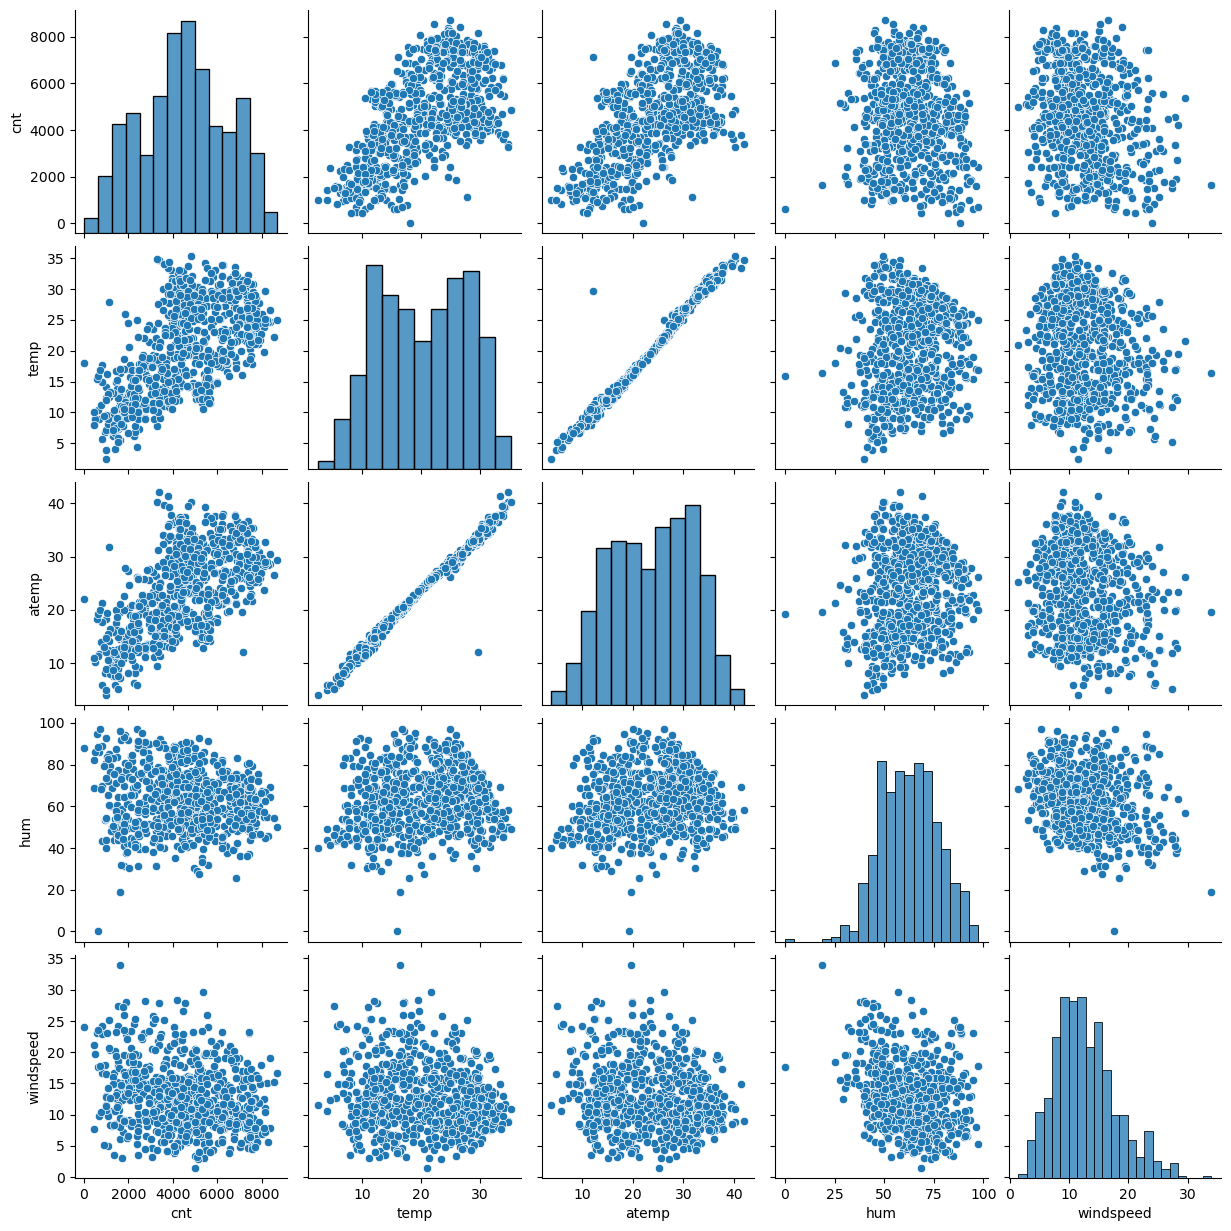

In [97]:
sns.pairplot(data=bike,vars=continous_var)
plt.show()

### Analysing the categorical variable

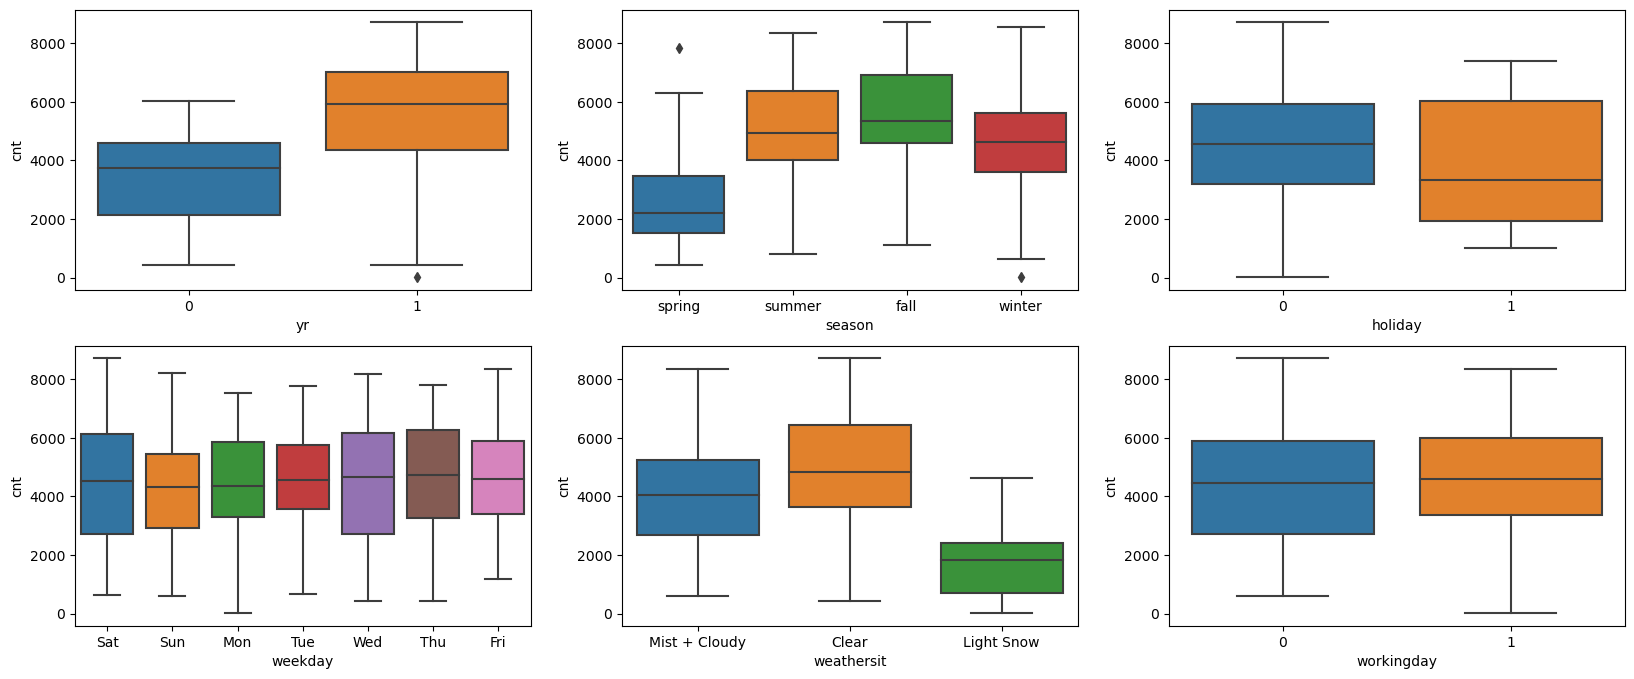

In [98]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x= "yr", y= "cnt", data=bike)

plt.subplot(2,3,2)
sns.boxplot(x= "season", y= "cnt", data=bike)

plt.subplot(2,3,3)
sns.boxplot(x= "holiday", y= "cnt", data=bike)

plt.subplot(2,3,4)
sns.boxplot(x= "weekday", y= "cnt", data=bike)

plt.subplot(2,3,5)
sns.boxplot(x= "weathersit", y= "cnt", data=bike)

plt.subplot(2,3,6)
sns.boxplot(x= "workingday", y= "cnt", data=bike)

plt.show()

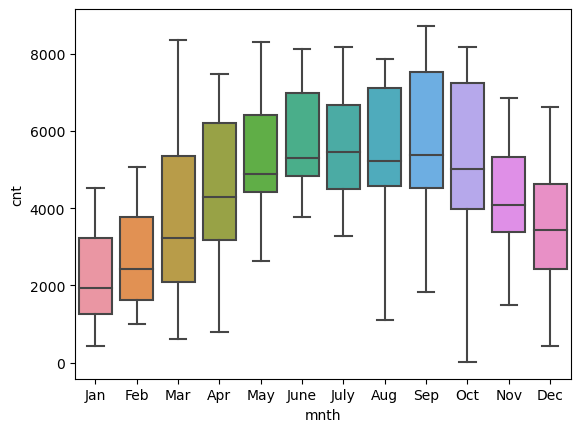

In [99]:
sns.boxplot(x= "mnth", y= "cnt", data=bike)
plt.show()

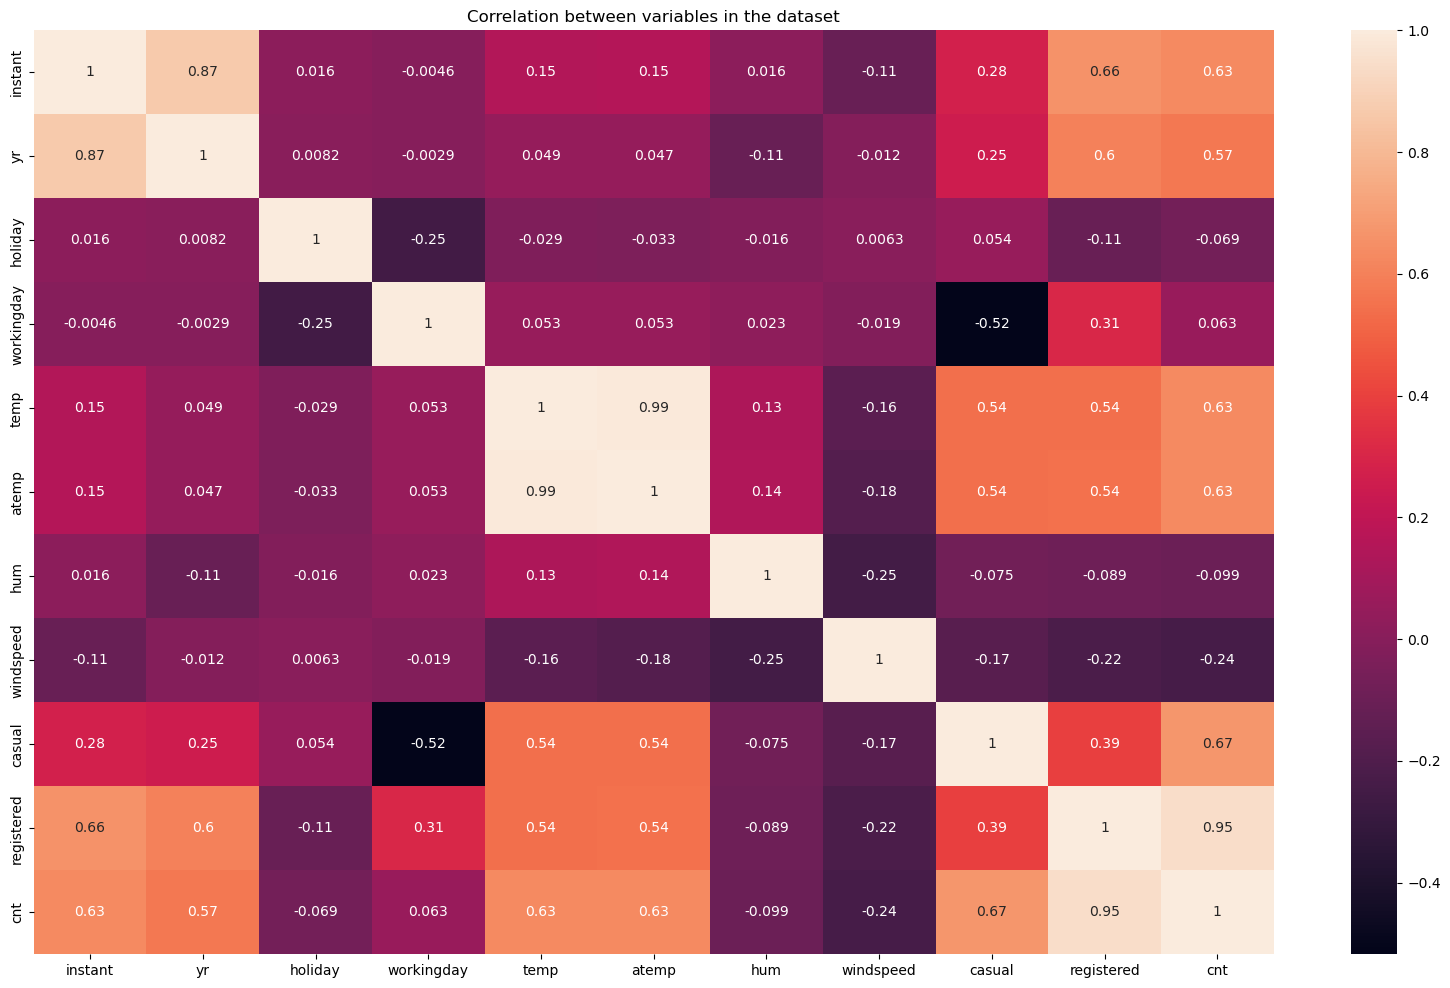

In [100]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike.corr(), annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

#### Dropping the undesired variables

In [101]:
bike=bike.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)

In [102]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


#### Creating Dummy Variables for the categorical variable

In [103]:
month=pd.get_dummies(bike.mnth,drop_first=True)
season=pd.get_dummies(bike.season,drop_first=True)
weekday=pd.get_dummies(bike.weekday,drop_first=True)
weather=pd.get_dummies(bike.weathersit,drop_first=True)

In [104]:
print(weather)

     Light Snow  Mist + Cloudy
0             0              1
1             0              1
2             0              0
3             0              0
4             0              0
..          ...            ...
725           0              1
726           0              1
727           0              1
728           0              0
729           0              1

[730 rows x 2 columns]


In [105]:
bike=pd.concat([bike,month,season,weekday,weather], axis=1 )
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [106]:
bike.shape

(730, 33)

In [107]:
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [108]:
bike.shape

(730, 29)

#### Preparing the data for training: train-test split and rescaling the data

In [109]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


In [110]:
df_train.shape

(510, 29)

In [111]:
df_test.shape

(219, 29)

In [112]:
#Scaling the variables

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=["cnt","temp","hum","windspeed"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [113]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


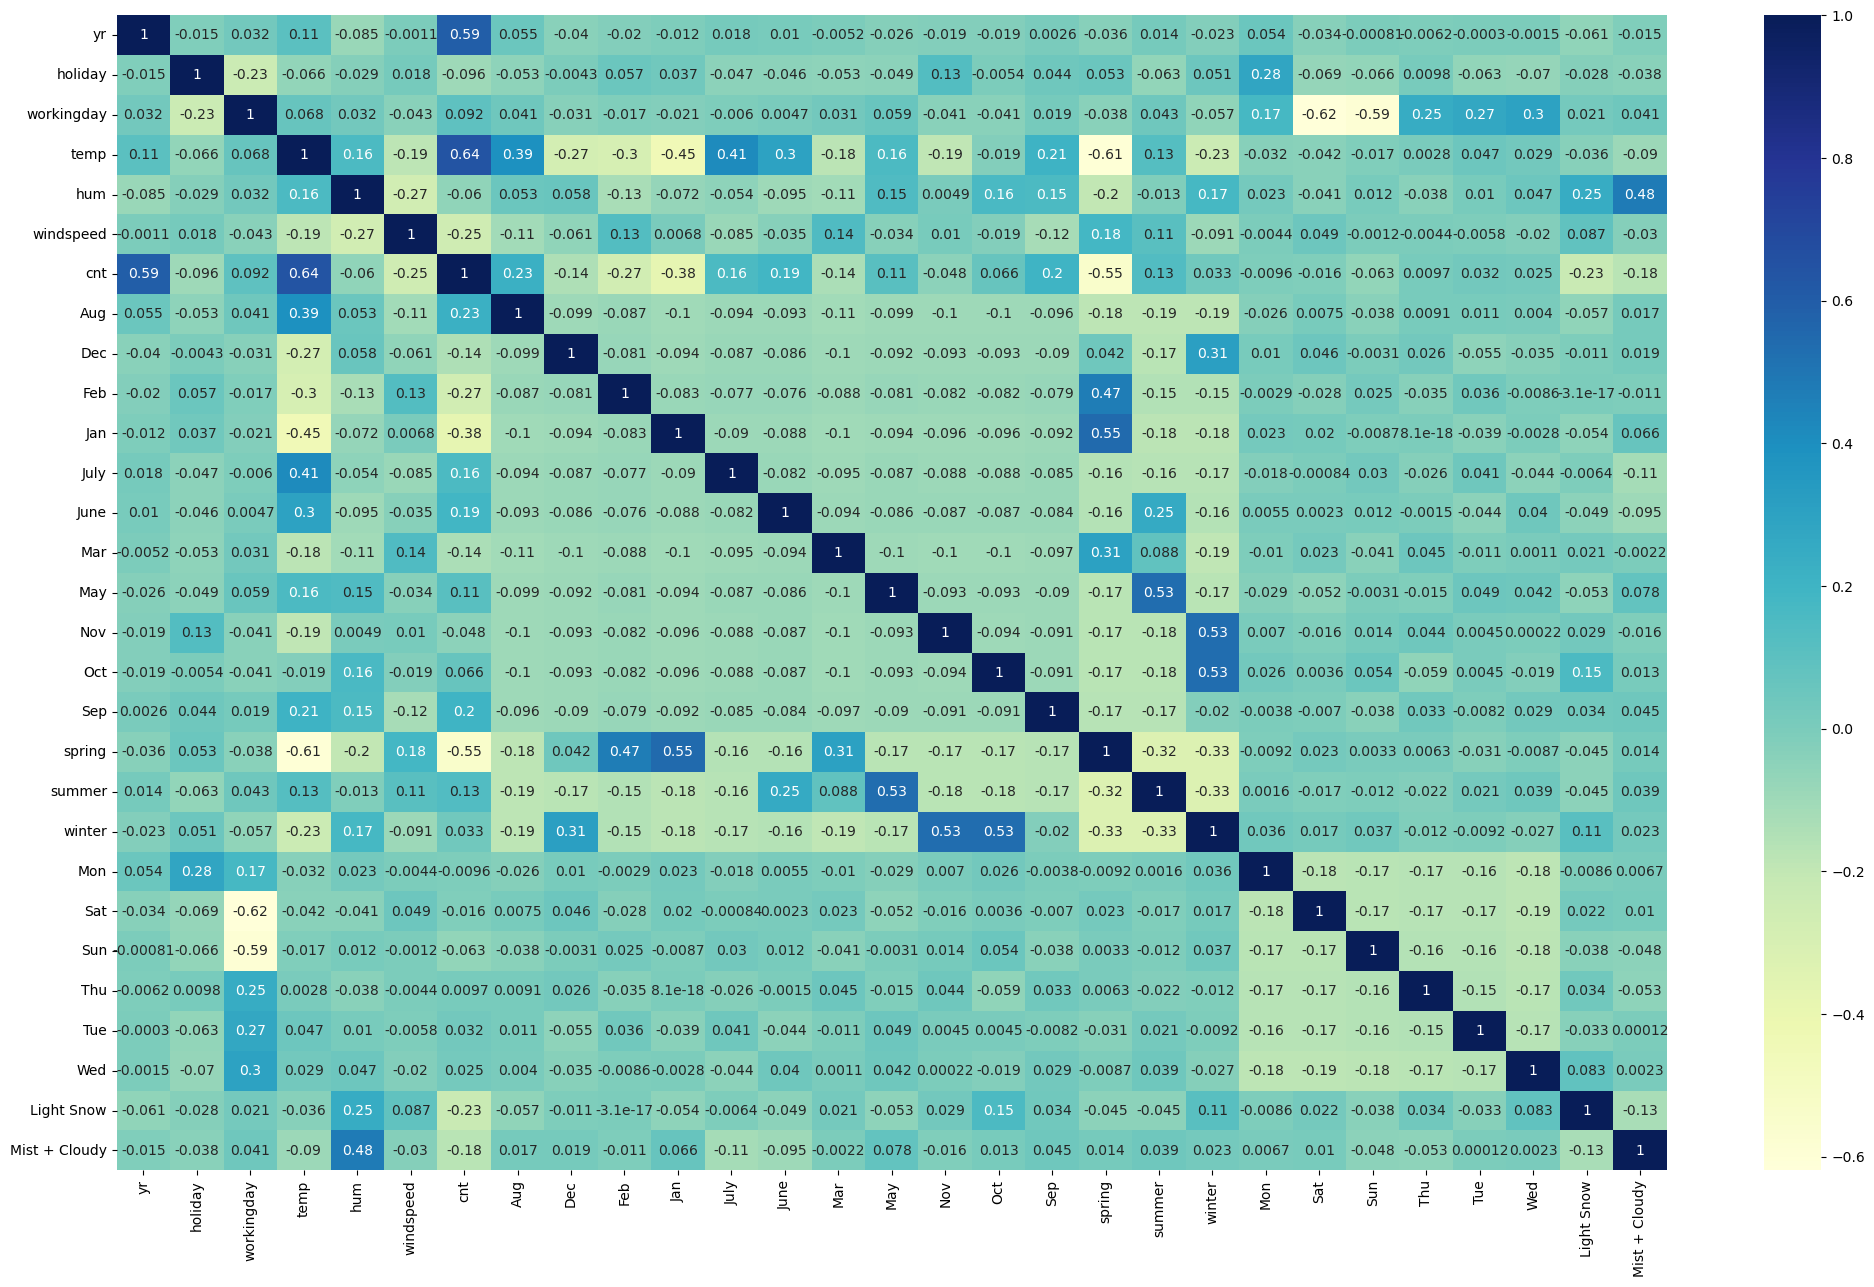

In [114]:
#Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Training the model

In [115]:
#Dividing the train_data into X-train and Y-train

y_train=df_train.pop("cnt")
x_train=df_train

In [116]:
import statsmodels.api as sm

# Add a constant
x_train_lm = sm.add_constant(x_train['temp'])

# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm)

#fit

lr_model=lr.fit()


#model params
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [117]:
#Model Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.80e-61
Time:                        11:57:37   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Adding another variable to check improvement in R2

# Add a constant
x_train_lm = sm.add_constant(x_train[['temp',"yr"]])

# Create a first fitted model
lr= sm.OLS(y_train, x_train_lm)

#fit

lr_model=lr.fit()


#model params
lr_model.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [119]:
#Model Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.25e-130
Time:                        11:57:37   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### By adding the year variable, the R2 is significantly improved

In [120]:
#Adding all the variables to check their influence on the CNT.

# Add a constant
x_train_lm = sm.add_constant(x_train)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm)

#fit

lr_model=lr.fit()


#model params
lr_model.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
Aug              0.014404
Dec             -0.045586
Feb             -0.032282
Jan             -0.062777
July            -0.040350
June            -0.002972
Mar              0.001045
May              0.023940
Nov             -0.041851
Oct              0.007534
Sep              0.081060
spring          -0.048159
summer           0.038725
winter           0.105847
Mon             -0.020907
Sat              0.096389
Sun              0.041853
Thu             -0.009237
Tue             -0.018890
Wed             -0.005388
Light Snow      -0.257443
Mist + Cloudy   -0.061066
dtype: float64

In [121]:
#Model Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        11:57:37   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
July             -0.0404      0.035     -1.151      0.250      -0.109       0.029
June             -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
May               0.0239      0.021      1.140      0.255      -0.017       0.065
Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
Sep               0.0811      0.032      2.533      0.012       0.018       0.144
spring           -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer            0.0387      0.026      1.478      0.140      -0.013       0.090
winter            0.1058      0.028      3.794      0.000       0.051       0.161
Mon              -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat               0.0964      0.014      7.029      0.000       0.069       0.123
Sun               0.0419      0.014      3.006      0.003       0.014       0.069
Thu              -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue              -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed              -0.0054      0.015     -0.362      0.718      -0.035       0.024
Light Snow       -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.30e+16
================================================================

##### Since there are many independent variables it would be difficult to remove the multicollinearity manually, hence we would use RFE to remove the multicollinearity



In [122]:
#Using RFE

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [123]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [124]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [125]:
#Selecting the variables marked as True by RFE

rfe_var= x_train.columns[rfe.support_]
rfe_var

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'spring', 'summer', 'winter', 'Sat', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [126]:
x_train_rfe=x_train[rfe_var]


In [127]:
# Add a constant
x_train_rfe_lm = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_lm)

#fir
lr_model=lr.fit()


#model params
lr_model.params

const            0.251042
yr               0.230502
holiday         -0.058529
workingday       0.043521
temp             0.509836
hum             -0.154716
windspeed       -0.185956
Jan             -0.034326
July            -0.053193
Sep              0.081186
spring          -0.050806
summer           0.049660
winter           0.094426
Sat              0.053721
Light Snow      -0.248777
Mist + Cloudy   -0.057824
dtype: float64

In [128]:
#Model Summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.31e-191
Time:                        11:57:39   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949      0.000       0.180       0.322
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
Jan              -0.0343      0.017     -1.980      0.048      -0.068      -0.000
July             -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep               0.0812      0.016      4.934      0.000       0.049       0.114
spring           -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer            0.0497      0.015      3.346      0.001       0.020       0.079
winter            0.0944      0.017      5.479      0.000       0.061       0.128
Sat               0.0537      0.014      3.707      0.000       0.025       0.082
Light Snow       -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist + Cloudy    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
x_train_rfe.values

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [130]:
#Checking the VIF of the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Dropping the constant variable from the 
x_train_rfe_lm= x_train_rfe_lm.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_lm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
9,spring,4.53
11,winter,3.48
10,summer,2.84
14,Mist + Cloudy,2.29
0,yr,2.09
12,Sat,1.98


In [131]:
#Dropping the hum feature since it has very high VIF

x_train_rfe_1=x_train_rfe_lm.drop(["hum"],axis=1)

# Add a constant
x_train_rfe_1 = sm.add_constant(x_train_rfe_1)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_1)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.173663
yr               0.234361
holiday         -0.056199
workingday       0.046502
temp             0.472823
windspeed       -0.156264
Jan             -0.038947
July            -0.048222
Sep              0.075318
spring          -0.059704
summer           0.043352
winter           0.079699
Sat              0.058434
Light Snow      -0.291727
Mist + Cloudy   -0.082621
dtype: float64

In [132]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.33e-189
Time:                        11:57:42   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.525      0.000       0.112       0.235
yr                0.2344      0.008     29.019      0.000       0.218       0.250
holiday          -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday        0.0465      0.012      3.983      0.000       0.024       0.069
temp              0.4728      0.034     14.037      0.000       0.407       0.539
windspeed        -0.1563      0.025     -6.292      0.000      -0.205      -0.107
Jan              -0.0389      0.018     -2.215      0.027      -0.073      -0.004
July             -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sep               0.0753      0.017      4.522      0.000       0.043       0.108
spring           -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer            0.0434      0.015      2.890      0.004       0.014       0.073
winter            0.0797      0.017      4.650      0.000       0.046       0.113
Sat               0.0584      0.015      3.980      0.000       0.030       0.087
Light Snow       -0.2917      0.024    -12.027      0.000      -0.339      -0.244
Mist + Cloudy    -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_1 = x_train_rfe_1.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_1
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
8,spring,3.08
9,summer,2.33
0,yr,2.08
10,winter,1.99
11,Sat,1.97
5,Jan,1.62
6,July,1.59


In [134]:
# Dropping the working day feature

x_train_rfe_2=x_train_rfe_1.drop(["workingday"],axis=1)

# Add a constant
x_train_rfe_2 = sm.add_constant(x_train_rfe_2)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_2)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.212097
yr               0.234633
holiday         -0.093921
temp             0.474065
windspeed       -0.157048
Jan             -0.038289
July            -0.051174
Sep              0.076032
spring          -0.061299
summer           0.042485
winter           0.076900
Sat              0.020135
Light Snow      -0.286860
Mist + Cloudy   -0.080792
dtype: float64

In [135]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.21e-186
Time:                        11:57:45   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2121      0.030      6.986      0.000       0.152       0.272
yr                0.2346      0.008     28.628      0.000       0.219       0.251
holiday          -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp              0.4741      0.034     13.868      0.000       0.407       0.541
windspeed        -0.1570      0.025     -6.231      0.000      -0.207      -0.108
Jan              -0.0383      0.018     -2.146      0.032      -0.073      -0.003
July             -0.0512      0.019     -2.758      0.006      -0.088      -0.015
Sep               0.0760      0.017      4.498      0.000       0.043       0.109
spring           -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer            0.0425      0.015      2.791      0.005       0.013       0.072
winter            0.0769      0.017      4.425      0.000       0.043       0.111
Sat               0.0201      0.011      1.788      0.074      -0.002       0.042
Light Snow       -0.2869      0.025    -11.668      0.000      -0.335      -0.239
Mist + Cloudy    -0.0808      0.009     -9.256      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_2 = x_train_rfe_2.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
7,spring,2.76
8,summer,2.23
0,yr,2.07
9,winter,1.80
4,Jan,1.61
5,July,1.59
12,Mist + Cloudy,1.56
6,Sep,1.34


In [137]:
#Dropping Jan since it has high p value

x_train_rfe_3=x_train_rfe_2.drop(["Jan"],axis=1)

# Add a constant
x_train_rfe_3 = sm.add_constant(x_train_rfe_3)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_3)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.196174
yr               0.233909
holiday         -0.094660
temp             0.492930
windspeed       -0.150024
July            -0.052878
Sep              0.076484
spring          -0.066781
summer           0.045581
winter           0.082981
Sat              0.019913
Light Snow      -0.285623
Mist + Cloudy   -0.081680
dtype: float64

In [138]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.97e-187
Time:                        11:57:47   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1962      0.030      6.640      0.000       0.138       0.254
yr                0.2339      0.008     28.461      0.000       0.218       0.250
holiday          -0.0947      0.026     -3.630      0.000      -0.146      -0.043
temp              0.4929      0.033     14.868      0.000       0.428       0.558
windspeed        -0.1500      0.025     -5.981      0.000      -0.199      -0.101
July             -0.0529      0.019     -2.842      0.005      -0.089      -0.016
Sep               0.0765      0.017      4.509      0.000       0.043       0.110
spring           -0.0668      0.021     -3.166      0.002      -0.108      -0.025
summer            0.0456      0.015      2.997      0.003       0.016       0.075
winter            0.0830      0.017      4.822      0.000       0.049       0.117
Sat               0.0199      0.011      1.762      0.079      -0.002       0.042
Light Snow       -0.2856      0.025    -11.579      0.000      -0.334      -0.237
Mist + Cloudy    -0.0817      0.009     -9.334      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       65.438   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.042
Skew:                          -0.706   Prob(JB):                     1.43e-31
Kurtosis:                       5.166   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_3 = x_train_rfe_3.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
7,summer,2.22
6,spring,2.10
0,yr,2.07
8,winter,1.80
4,July,1.58
11,Mist + Cloudy,1.55
5,Sep,1.34
9,Sat,1.19


In [140]:
#Dropping sat since it has high p value

x_train_rfe_4=x_train_rfe_3.drop(["Sat"],axis=1)

# Add a constant
x_train_rfe_4 = sm.add_constant(x_train_rfe_4)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_4)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.199648
yr               0.233482
holiday         -0.098013
temp             0.491508
windspeed       -0.147977
July            -0.052418
Sep              0.076686
spring          -0.066942
summer           0.045280
winter           0.083084
Light Snow      -0.285155
Mist + Cloudy   -0.081558
dtype: float64

In [141]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.40e-187
Time:                        11:57:50   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758      0.000       0.142       0.258
yr                0.2335      0.008     28.361      0.000       0.217       0.250
holiday          -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp              0.4915      0.033     14.798      0.000       0.426       0.557
windspeed        -0.1480      0.025     -5.893      0.000      -0.197      -0.099
July             -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep               0.0767      0.017      4.511      0.000       0.043       0.110
spring           -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer            0.0453      0.015      2.971      0.003       0.015       0.075
winter            0.0831      0.017      4.818      0.000       0.049       0.117
Light Snow       -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist + Cloudy    -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_4 = x_train_rfe_4.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_4
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.21
6,spring,2.08
0,yr,2.07
8,winter,1.79
4,July,1.58
10,Mist + Cloudy,1.55
5,Sep,1.34
9,Light Snow,1.08


In [143]:
#Dropping July because of high p value

x_train_rfe_5=x_train_rfe_4.drop(["July"],axis=1)

# Add a constant
x_train_rfe_5 = sm.add_constant(x_train_rfe_5)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_5)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.190994
yr               0.234060
holiday         -0.096865
temp             0.478177
windspeed       -0.148155
Sep              0.090932
spring          -0.055092
summer           0.060987
winter           0.095929
Light Snow      -0.286002
Mist + Cloudy   -0.080124
dtype: float64

In [144]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.36e-187
Time:                        11:57:51   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1910      0.030      6.456      0.000       0.133       0.249
yr                0.2341      0.008     28.246      0.000       0.218       0.250
holiday          -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp              0.4782      0.033     14.446      0.000       0.413       0.543
windspeed        -0.1482      0.025     -5.860      0.000      -0.198      -0.098
Sep               0.0909      0.016      5.565      0.000       0.059       0.123
spring           -0.0551      0.021     -2.641      0.009      -0.096      -0.014
summer            0.0610      0.014      4.271      0.000       0.033       0.089
winter            0.0959      0.017      5.730      0.000       0.063       0.129
Light Snow       -0.2860      0.025    -11.492      0.000      -0.335      -0.237
Mist + Cloudy    -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_5 = x_train_rfe_5.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.89
7,winter,1.63
9,Mist + Cloudy,1.54
4,Sep,1.23
8,Light Snow,1.08
1,holiday,1.04


In [146]:
#Dropping windspeed beacause of high VIF

x_train_rfe_6=x_train_rfe_5.drop(["windspeed"],axis=1)

# Add a constant
x_train_rfe_6 = sm.add_constant(x_train_rfe_6)

# Create a first fitted model
lr = sm.OLS(y_train, x_train_rfe_6)

#fit
lr_model=lr.fit()


#model params
lr_model.params

const            0.141513
yr               0.233091
holiday         -0.099654
temp             0.490047
Sep              0.095351
spring          -0.064466
summer           0.051232
winter           0.097123
Light Snow      -0.300765
Mist + Cloudy   -0.078390
dtype: float64

In [147]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.89e-181
Time:                        11:57:53   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1415      0.029      4.833      0.000       0.084       0.199
yr                0.2331      0.009     27.241      0.000       0.216       0.250
holiday          -0.0997      0.027     -3.678      0.000      -0.153      -0.046
temp              0.4900      0.034     14.362      0.000       0.423       0.557
Sep               0.0954      0.017      5.657      0.000       0.062       0.128
spring           -0.0645      0.021     -3.001      0.003      -0.107      -0.022
summer            0.0512      0.015      3.498      0.001       0.022       0.080
winter            0.0971      0.017      5.617      0.000       0.063       0.131
Light Snow       -0.3008      0.026    -11.762      0.000      -0.351      -0.251
Mist + Cloudy    -0.0784      0.009     -8.616      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       68.892   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.059
Skew:                          -0.702   Prob(JB):                     5.29e-37
Kurtosis:                       5.427   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#Again checking the VIF

#Dropping the constant variable from the 
x_train_rfe_6 = x_train_rfe_6.drop(['const'], axis=1)

#calculating the VIF
vif = pd.DataFrame()
x = x_train_rfe_6
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.89
0,yr,2.06
5,summer,1.62
8,Mist + Cloudy,1.54
6,winter,1.44
4,spring,1.33
3,Sep,1.23
7,Light Snow,1.07
1,holiday,1.04


#### Since the both p-value and VIF is within the acceptable range i.e p-value is <0.05 and VIF is <5, we would not remove further parameter. Moreover, the we have also achieved R2 of 82.2%, i.e 82.2% of the variace in the depedent variable is being explained by the independent variables.

### Residual Analysis

In [149]:
x_train_rfe_6 = sm.add_constant(x_train_rfe_6)

x_train_rfe_6

,const,yr,holiday,temp,Sep,spring,summer,winter,Light Snow,Mist + Cloudy
653,1.0,1,0,0.509887,0,0,0,1,0,0
576,1.0,1,0,0.815169,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,0,0,1
728,1.0,1,0,0.245101,0,1,0,0,0,0
482,1.0,1,0,0.395666,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0,0,1,0,0,1
578,1.0,1,0,0.863973,0,0,0,0,0,0
53,1.0,0,0,0.202618,0,1,0,0,0,0
350,1.0,0,0,0.248216,0,0,0,1,0,1


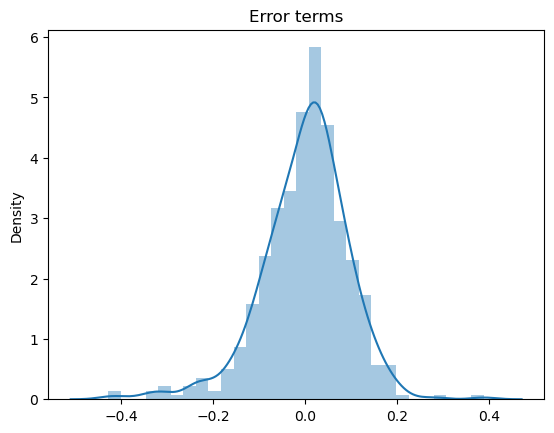

In [150]:
#y-train predict

y_train_pred=lr_model.predict(x_train_rfe_6)

#Residual

res=y_train-y_train_pred

sns.distplot(res)
plt.title('Error terms')
plt.show()

In [151]:
#Making prediction on the test data set

num_vars

['cnt', 'temp', 'hum', 'windspeed']

In [152]:
#performing scaling on the test data set 

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [153]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
y_test=df_test.pop("cnt")
x_test=df_test

In [155]:
#Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

x_train_rfe_6 = x_train_rfe_6.drop(['const'], axis=1)

x_test_new = x_test[x_train_rfe_6.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

x_test_new

,const,yr,holiday,temp,Sep,spring,summer,winter,Light Snow,Mist + Cloudy
184,1.0,0,1,0.831783,0,0,0,0,0,1
535,1.0,1,0,0.901354,0,0,1,0,0,0
299,1.0,0,0,0.511964,0,0,0,1,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0,1,0,0,0,1
702,1.0,1,0,0.519232,0,0,0,1,0,0
127,1.0,0,0,0.584649,0,0,1,0,0,0
640,1.0,1,0,0.745598,0,0,0,1,0,1


In [158]:
#Making the prediction

y_test_pred = lr_model.predict(x_test_new)

#### Model Evaluation

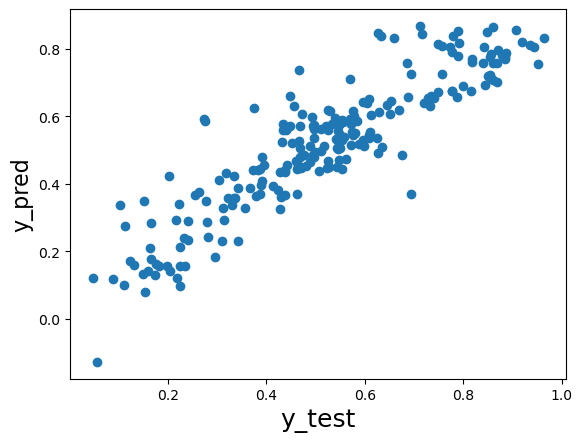

In [166]:
#Ploting the graph for actual vs predicted values i.e y_test and y_pred

plt.scatter(y_test,y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)   
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)  

plt.show()

In [168]:
#Checking the r2 score on the test set
from sklearn.metrics import r2_score

r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8088172921479285


### Equation of the best fitted line

cnt = 0.2330×yr + 0.4900×temp - 0.0996×holiday + 0.09535×Sep - 0.30076×LightSnow - 0.07839×MistCloudy - 0.0644×spring + 0.051232×summer + 0.097123×winter + 0.14151


## Summary

#### The summary of the modelling after data cleaning, data visualisation and applying Multiple Linear Regression model on the data set is as follows:

1. The final R-squared values is 82.2%, which is significantly high since 82.2% variance in the predicted variable is explained by the set of the independent variables.

2. Since there were large number of the independent variable, we had used RFE method for finding the significant variable and then manually computed the p-value and VIF for further elimination of the multicollinearity. The p-value and the VIF of the predictor variable are within the acceptable limits. Moreover, the error terms are normally distributed with mean equal to zero. 

3. Hence, bike demand for the BoomBikes is dependent on the temperature and whether it is working day or not. Moreover, the rentals also depends on the weather condition, it would be more if the weather is clear. The demand for bikes would also be more during summer and fall as compared to winter. The demand would also be high during the month of September. 

4. Based on the above findings, the BoomBikes should consider doing aggressive marketing during Summer and Fall. Moreover, when the weather condition is not clear, there is low demand for the bike, hence they should design a strategy to increase the rentals by incentivising the customers. Rentals were significantly more during 2019 as compared to 2018, hence company should revisit the marketing strategy of 2018 to check how the same could be leveraged to improve the sales.  